Epoch 50/500, Loss: 1.0751
Epoch 100/500, Loss: 0.8322
Epoch 150/500, Loss: 0.5471
Epoch 200/500, Loss: 0.4284
Epoch 250/500, Loss: 0.3585
Epoch 300/500, Loss: 0.3079
Epoch 350/500, Loss: 0.2680
Epoch 400/500, Loss: 0.2349
Epoch 450/500, Loss: 0.2068
Epoch 500/500, Loss: 0.1827


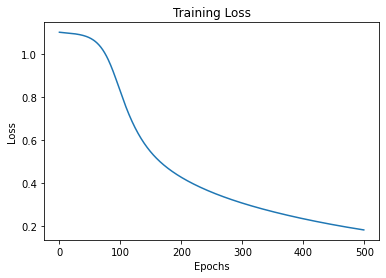

Test Accuracy: 100.00%
Training Accuracy: 95.83%


In [217]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. 数据准备
iris = datasets.load_iris()
X = iris.data  # (150, 4)
y = iris.target.reshape(-1, 1)  # (150, 1)

# One-Hot 编码
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# 2. 激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# 3. 初始化参数

input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]

W1 = np.random.randn(input_size, hidden_size) * 0.03
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.03
b2 = np.zeros((1, output_size))

learning_rate = 0.05
epochs = 500

# 4. 训练模型
losses = []

for epoch in range(epochs):
    # 前向传播
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    # 计算损失
    loss = cross_entropy_loss(A2, y_train)
    losses.append(loss)
    
    # 反向传播
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]
    
    # 更新参数
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # 每 50 轮打印一次损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

# 5. 绘制损失曲线
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# 6. 评估模型
def predict(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A2

# 测试集准确率
y_pred_test = predict(X_test)
y_pred_labels = np.argmax(y_pred_test, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_labels == y_true_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# 训练集准确率
y_pred_train = predict(X_train)
y_pred_train_labels = np.argmax(y_pred_train, axis=1)
y_true_train_labels = np.argmax(y_train, axis=1)
accuracy_train = np.mean(y_pred_train_labels == y_true_train_labels)
print(f'Training Accuracy: {accuracy_train * 100:.2f}%')


In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. 数据准备
digits = datasets.load_digits()
X = digits.data  # (1797, 64)
y = digits.target.reshape(-1, 1)  # (1797, 1)

# One-Hot 编码
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# 特征标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# 2. 激活函数和损失函数
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# 3. 初始化参数
np.random.seed(42)
input_size = X_train.shape[1]  # 64
hidden_size = 32               # 可调整
output_size = y_train.shape[1] # 10

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

learning_rate = 0.05
epochs = 500

# 4. 训练模型
losses = []
# 初始化准确率列表
accuracies_train = []
accuracies_test = []

for epoch in range(epochs):
    # 前向传播
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    # 计算损失
    loss = cross_entropy_loss(A2, y_train)
    losses.append(loss)
    
    # 反向传播
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]
    
    # 更新参数
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    # 计算并记录准确率
    if (epoch + 1) % 10 == 0:
        # 训练集准确率
        y_pred_train = predict(X_train)
        y_pred_train_labels = np.argmax(y_pred_train, axis=1)
        y_true_train_labels = np.argmax(y_train, axis=1)
        accuracy_train = np.mean(y_pred_train_labels == y_true_train_labels)
        accuracies_train.append(accuracy_train)
        
        # 测试集准确率
        y_pred_test = predict(X_test)
        y_pred_test_labels = np.argmax(y_pred_test, axis=1)
        y_true_test_labels = np.argmax(y_test, axis=1)
        accuracy_test = np.mean(y_pred_test_labels == y_true_test_labels)
        accuracies_test.append(accuracy_test)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Training Accuracy: {accuracy_train * 100:.2f}%, Test Accuracy: {accuracy_test * 100:.2f}%")


Epoch 10/500, Loss: 2.3008, Training Accuracy: 19.83%, Test Accuracy: 17.22%
Epoch 20/500, Loss: 2.2985, Training Accuracy: 21.09%, Test Accuracy: 18.61%
Epoch 30/500, Loss: 2.2957, Training Accuracy: 24.22%, Test Accuracy: 20.83%
Epoch 40/500, Loss: 2.2919, Training Accuracy: 30.83%, Test Accuracy: 25.56%
Epoch 50/500, Loss: 2.2864, Training Accuracy: 38.69%, Test Accuracy: 32.78%
Epoch 60/500, Loss: 2.2783, Training Accuracy: 47.60%, Test Accuracy: 41.67%
Epoch 70/500, Loss: 2.2663, Training Accuracy: 57.06%, Test Accuracy: 54.72%
Epoch 80/500, Loss: 2.2484, Training Accuracy: 61.10%, Test Accuracy: 61.11%
Epoch 90/500, Loss: 2.2219, Training Accuracy: 61.73%, Test Accuracy: 61.11%
Epoch 100/500, Loss: 2.1832, Training Accuracy: 60.13%, Test Accuracy: 60.00%
Epoch 110/500, Loss: 2.1278, Training Accuracy: 56.78%, Test Accuracy: 56.11%
Epoch 120/500, Loss: 2.0518, Training Accuracy: 54.00%, Test Accuracy: 55.00%
Epoch 130/500, Loss: 1.9528, Training Accuracy: 53.24%, Test Accuracy: 55

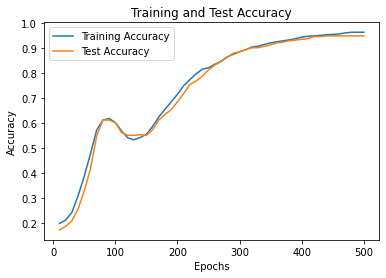

In [220]:
# 绘制准确率曲线
plt.plot(range(10, epochs+1, 10), accuracies_train, label='Training Accuracy')
plt.plot(range(10, epochs+1, 10), accuracies_test, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()


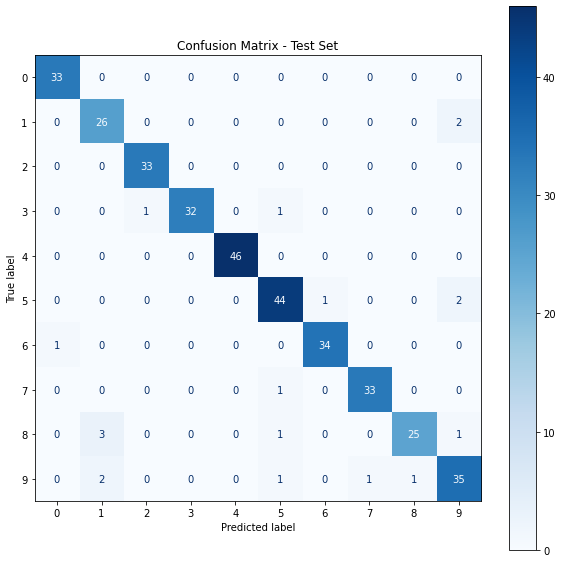

In [221]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 计算混淆矩阵
cm = confusion_matrix(y_true_test_labels, y_pred_test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


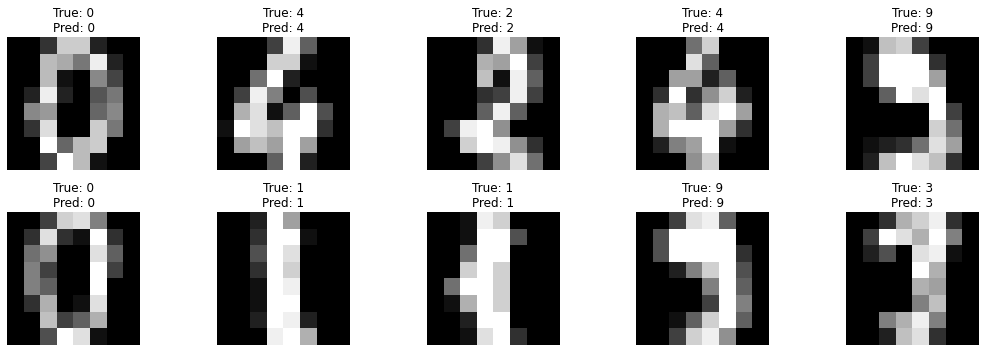

In [222]:
# 获取真实标签和预测标签
y_pred_test = predict(X_test)
y_pred_labels = np.argmax(y_pred_test, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# 随机选择 10 个样本
num_samples = 10
indices = np.random.choice(range(X_test.shape[0]), num_samples, replace=False)

# 获取对应的图像、真实标签和预测标签
samples = X_test[indices]
true_labels = y_true_labels[indices]
pred_labels = y_pred_labels[indices]

# 绘制图像和标签
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    # 将标准化后的特征逆标准化以显示图像
    img = scaler.inverse_transform(samples[i]).reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
